Import Library

In [1]:
pip install python-dotenv

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

from skimage import io, morphology, measure, segmentation, filters
from skimage.io import imread, imshow
from skimage.filters import gaussian, threshold_otsu
from skimage.segmentation import active_contour 
from scipy.ndimage import distance_transform_edt
from skimage.measure import label, regionprops

Show Original Image

(-0.5, 369.5, 241.5, -0.5)

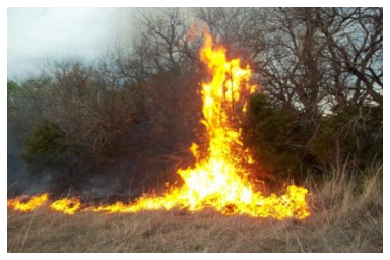

In [3]:
# Load image
# Baca citra dalam format BGR (default OpenCV)
image = io.imread('./image/image1.png')

# Tampilkan citra Original (RGB)
cv2.imshow('Image Original', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

io.imshow(image)
plt.axis('off')
# plt.colorbar()

Detect Fire in Image using API

In [4]:
import requests
from dotenv import load_dotenv
import os

load_dotenv()

API_TOKEN = os.environ["API_TOKEN"]

API_URL = "https://api-inference.huggingface.co/models/EdBianchi/vit-fire-detection"
headers = {"Authorization": f"Bearer {API_TOKEN}"}

def query(filename):
    with open(filename, "rb") as f:
        data = f.read()
    response = requests.post(API_URL, headers=headers, data=data)
    return response.json()

output = query("./image/image1.png")

print(output)

# Looping output json
for o in output:
    # Cari label fire
    if o['label'].lower() == 'fire':
        if o['score'] >= 0.7:
            print('Fire detected')
        else:
            print('Fire undetected')
            
            # Stop the execution of the cell
            raise KeyboardInterrupt

[{'score': 0.9986860156059265, 'label': 'Fire'}, {'score': 0.000986315542832017, 'label': 'Normal'}, {'score': 0.00032760860631242394, 'label': 'Smoke'}]
Fire undetected


KeyboardInterrupt: 

Convert to HSV

In [ ]:
# Konversi citra ke format HSV
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Simpan citra HSV
cv2.imwrite('./image/hsv/image1_hsv.png', image_hsv)

# Tampilkan citra HSV
cv2.imshow('HSV Image', image_hsv)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Tampilkan citra HSV
# plt.imshow(image_hsv)
# plt.show()

show_image_hsv = io.imread('./image/hsv/image1_hsv.png')
io.imshow(show_image_hsv)
plt.axis('off')

Using Threshold in HSV

In [ ]:
# Ambil channel H, S, V dari citra HSV
h_channel, s_channel, v_channel = cv2.split(image_hsv)

# Threshold pada channel V menggunakan nilai threshold min dan max
threshold_min_v = 123
threshold_max_v = 255
_, v_thresh = cv2.threshold(v_channel, threshold_min_v, threshold_max_v, cv2.THRESH_BINARY)

threshold_min_s = 123
threshold_max_s = 255
_s, s_thresh = cv2.threshold(s_channel, threshold_min_s, threshold_max_s, cv2.THRESH_BINARY)

# Gabungkan kembali channel H, S, dan channel V yang telah di-threshold
thresholded_image = cv2.merge((h_channel, s_thresh, v_thresh))

# Simpan citra HSV
cv2.imwrite('./image/hsv/image1_hsv_threshold.png', thresholded_image)

# Tampilkan citra HSV
cv2.imshow('HSV Threshold Image', thresholded_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# plt.imshow(thresholded_image)
# plt.show()

show_thresholded_image = io.imread('./image/hsv/image1_hsv_threshold.png')
io.imshow(show_thresholded_image)
plt.axis('off')

Convert Citra to Grayscale

In [ ]:
def hsv_to_grayscale(hsv_image):
    # Ambil komponen Hue, Saturation, dan Value dari citra HSV
    hue, saturation, value = cv2.split(hsv_image)
    
    # Hitung nilai rata-rata dari komponen Hue, Saturation, dan Value
    grayscale_image = np.mean([hue, saturation, value], axis=0).astype(np.uint8)
    
    return grayscale_image

# Konversi citra dari format HSV ke grayscale
grayscale_image = hsv_to_grayscale(thresholded_image)

# Simpan citra HSV
cv2.imwrite('./image/hsv/image1_grayscale.png', grayscale_image)

# Tampilkan citra HSV
cv2.imshow('Grayscale Image', grayscale_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Tampilkan citra grayscale
# plt.imshow(grayscale_image, cmap='gray')
# plt.show()

show_grayscale_image = io.imread('./image/hsv/image1_grayscale.png')
io.imshow(show_grayscale_image)
plt.axis('off')

Using Threshold in Grayscale

In [ ]:
def apply_threshold(image, threshold_value):
    # Lakukan thresholding menggunakan metode Binary
    _, thresholded_image = cv2.threshold(image, threshold_value, 255, cv2.THRESH_BINARY)

    return thresholded_image

# Tentukan nilai threshold
# threshold_value = 143 
threshold_value = 163

# Terapkan thresholding pada citra grayscale
thresholded_image = apply_threshold(grayscale_image, threshold_value)
# combined = thresholded_image

# menghilangkan noise yang ada pada citra walaupun sudah dilakukan threshold
filtered_image = cv2.medianBlur(thresholded_image, 3)
combined = filtered_image

# _, binary = cv2.threshold(thresholded_image, 0, 255, cv2.THRESH_BINARY)
# combined = thresholded_image

# Simpan citra hasil thresholding
cv2.imwrite('./image/grayscale/image1_grayscale_threshold.png', filtered_image)

# Tampilkan citra grayscale
# plt.imshow(filtered_image, cmap='gray')
# plt.show()

# Tampilkan citra HSV
cv2.imshow('Grayscale Threhold Image', filtered_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

show_filtered_image = io.imread('./image/grayscale/image1_grayscale_threshold.png')
io.imshow(show_filtered_image)
plt.axis('off')

Performing Otsu's Binarization

In [ ]:
ret, thresh = cv2.threshold(combined, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
print("Threshold limit: " + str(ret))

plt.axis('off')
plt.imshow(thresh, cmap='gray')

Specifying the Background and Foreground after Noise Removal

In [ ]:
# noise removal
# kernel = np.ones((3, 3), np.uint8)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 1))
opening = cv2.morphologyEx(combined, cv2.MORPH_OPEN, kernel, iterations=2)

# # sure background area
# sure_bg = cv2.dilate(opening, kernel, iterations = 3)

# sure foreground area
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
# ret, sure_fg = cv2.threshold(dist_transform, 0.7*dist_transform.max(),255,0)
ret, sure_fg = cv2.threshold(dist_transform, 0.01*dist_transform.max(),255,0)

sure_bg = cv2.subtract(opening, sure_fg.astype(np.uint8))

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

Performing Distance Transform

In [ ]:
plt.axis('off')
plt.imshow(dist_transform, cmap='gray')

Plotting the Foreground, Background and the Subtracted Image

In [ ]:
fig = plt.figure(figsize = (20, 10)) # to change figsize
plt.subplot(131)
plt.axis('off')
plt.imshow(sure_bg, cmap = 'gray')
plt.title('Sure background, dilated')

plt.subplot(132)
plt.imshow(sure_fg, cmap = 'gray')
plt.axis('off')
plt.title('Sure foreground, eroded')

plt.subplot(133)
plt.axis('off')
plt.imshow(unknown, cmap = 'gray')

plt.title('Subtracted image, black - sure bg & fg')
plt.tight_layout()

plt.subplots_adjust(wspace = 0.5)
# fine tuning 

Displaying the connected components sure_bg and sure_fg

In [ ]:
ret, markers = cv2.connectedComponents(sure_fg)

markers = markers + 1

markers[unknown==255] = 0

fig = plt.figure(figsize = (20, 10)) # to change figsize
plt.subplot(121)
plt.axis('off')
plt.imshow(markers, cmap = 'RdYlBu')
plt.axis('off')
plt.subplot(122)
plt.imshow(markers)

# save = imshow(markers, cmap = 'RdYlBu')
# plt.imsave('./image/watershed/fire1_watershed.png', save)

# Simpan citra hasil thresholding
cv2.imwrite('./image/watershed/fire1_watershed.png', markers)

# img_watershed = cv2.imread('./image/watershed/fire1_watershed.png')

# cv2.imshow('watershed segmentation', img_watershed)

Memberikan Warna pada citra watershed

In [ ]:
# def colorize_segmentation(image_segmented):
#     # Convert the segmented image to 8-bit
#     image_segmented = np.uint8(image_segmented)

#     # Generate a unique color for each label
#     num_labels = np.max(image_segmented) + 1
#     colors = np.random.randint(0, 255, (num_labels, 3), dtype=np.uint8)

#     # Create the colorized segmentation image
#     image_colorized = colors[image_segmented]

#     return image_colorized

def colorize_background(image_segmented, background_color):
    # Invert the segmented image
    inverted_image = cv2.bitwise_not(image_segmented)

    # Convert the inverted image to binary (0 for background, 1 for objects)
    binary_image = np.uint8(inverted_image > 0)

    # Expand the dimensions of the binary image to have 3 channels (RGB)
    expanded_image = np.expand_dims(binary_image, axis=2)

    # Multiply the expanded binary image with the background color (in BGR format)
    colored_background = expanded_image * np.array(background_color, dtype=np.uint8)

    return colored_background

# Load segmented image (result of watershed segmentation)
image_segmented = cv2.imread('./image/watershed/image1_watershed.png', cv2.IMREAD_GRAYSCALE)

# Define the background color (in BGR format)
background_color = [0, 255, 255]  # Yellow background

# Colorize segmented image
image_colorized = colorize_background(image_segmented, background_color)

# Convert BGR image to RGB for displaying with matplotlib
background_watershed = cv2.cvtColor(image_colorized, cv2.COLOR_BGR2RGB)

# Display the colorized image
plt.imshow(background_watershed)
plt.axis('off')
plt.show()

In [ ]:
def colorize_segmentation(image_segmented):
    # Convert the segmented image to 8-bit
    image_segmented = np.uint8(image_segmented)

    # Generate a unique color for each label
    num_labels = np.max(image_segmented) + 1
    colors = np.random.randint(0, 255, (num_labels, 3), dtype=np.uint8)

    # Create the colorized segmentation image
    image_colorized = colors[image_segmented]

    return image_colorized

# Load segmented image (result of watershed segmentation)
image_segmented = cv2.imread('./image/watershed/image1_watershed.png', cv2.IMREAD_GRAYSCALE)

# Colorize segmented image
image_colorized = colorize_segmentation(image_segmented)

# Convert BGR image to RGB for displaying with matplotlib
result = cv2.cvtColor(image_colorized, cv2.COLOR_BGR2RGB)

# Display the colorized image
plt.imshow(result)
plt.axis('off')
plt.show()

In [ ]:
def colorize_background(image_segmented, background_color):
    # Invert the segmented image
    inverted_image = cv2.bitwise_not(image_segmented)

    # Convert the inverted image to binary (0 for background, 1 for objects)
    binary_image = np.uint8(inverted_image > 0)

    # Expand the dimensions of the binary image to have 3 channels (RGB)
    expanded_image = np.expand_dims(binary_image, axis=2)

    # Multiply the expanded binary image with the background color (in BGR format)
    colored_background = expanded_image * np.array(background_color, dtype=np.uint8)

    return colored_background

def colorize_foreground(image_segmented, foreground_color):
    # Convert the segmented image to binary (0 for background, 1 for objects)
    binary_image = np.uint8(image_segmented > 0)

    # Expand the dimensions of the binary image to have 3 channels (RGB)
    expanded_image = np.expand_dims(binary_image, axis=2)

    # Multiply the expanded binary image with the foreground color (in BGR format)
    colored_foreground = expanded_image * np.array(foreground_color, dtype=np.uint8)

    return colored_foreground

# # Load segmented image (result of watershed segmentation)
image_segmented = cv2.imread('./image/watershed/image1_watershed.png', cv2.IMREAD_GRAYSCALE)

# Define the background color (in BGR format)
background_color = [0, 255, 255]  # Yellow background

# Define the foreground color (in BGR format)
foreground_color = [0, 255, 0]  # Green foreground

# Colorize the background
colored_background = colorize_background(image_segmented, background_color)

# Colorize the foreground
colored_foreground = colorize_foreground(image_segmented, foreground_color)

# Combine the colored background and colored foreground
result_image = cv2.add(colored_background, colored_foreground)

# Display the result image
plt.imshow(image_segmented)
plt.axis('off')
plt.show()


In [ ]:
# Load the two images
image1 = cv2.imread('./image/watershed/image1_watershed.png')
image2 = cv2.imread('./image/contour/image1_contour.png')

# Periksa ukuran kedua citra
if image1.shape != image2.shape:
    # Sesuaikan ukuran citra kedua dengan ukuran citra pertama
    image2 = cv2.resize(image2, (image1.shape[1], image1.shape[0]))

# Add the two images
merged_image = cv2.add(image1, image2)

# Simpan citra hasil thresholding
io.imsave('./image/merged/image1_final.png', merged_image)

# Display the merged image
plt.axis('off')
plt.imshow(merged_image)
plt.show()

Applying Watershed Segmentation

In [ ]:
# markers = cv2.watershed(image, markers)
# image[markers == -1] = [0, 255,0]

In [ ]:
plt.imshow(image)

Contour image

In [ ]:
# # Load citra sebaran api
image_contour = cv2.imread('./image/grayscale/image1_grayscale_threshold.png')

# Konversi citra ke citra biner (grayscale dengan tipe data CV_8UC1)
gray = cv2.cvtColor(image_contour, cv2.COLOR_BGR2GRAY)
_, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY)

# Temukan kontur pada citra biner
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Gambar kontur pada citra asli
cv2.drawContours(image_contour, contours, -1, (0, 255, 0), 2)

# # Draw contours on the mask image
# cv2.drawContours(mask, contours, -1, (255), thickness=cv2.FILLED)

# Tampilkan citra dengan kontur
cv2.imshow('Fire Contour', image_contour)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
# Load citra sebaran api
image_test_contour = cv2.imread('./image/image1.png')

## convert to hsv
hsv = cv2.cvtColor(image_test_contour, cv2.COLOR_BGR2HSV)

# # Tentukan rentang warna sebaran api dalam format HSV
lower_fire = np.array([23, 100, 100])
upper_fire = np.array([30, 255, 255])

# Buat mask menggunakan inRange
mask = cv2.inRange(hsv, lower_fire, upper_fire)

# Temukan kontur pada citra hasil operasi morfologi
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Gambar kontur pada citra asli
cv2.drawContours(image_test_contour, contours, -1, (0, 255, 0), 1)

# Simpan citra hasil thresholding
cv2.imwrite('./image/contour/image1_contour.png', image_test_contour)

# Tampilkan citra dengan kontur
cv2.imshow('Fire Contour', image_test_contour)
cv2.waitKey(0)
cv2.destroyAllWindows()


Gabungan citra watershed dan contour

In [ ]:
# # Read the RGB image (Gambar 1)
# image_rgb = cv2.imread('./image/image1.png')

# # Read the contour image (Gambar 6)
# image_contour = cv2.imread('./image/contour/image1_contour.png')

# # Read the segmented image (Gambar 8(b))
# image_segmented = cv2.imread('./image/watershed/image1_watershed.png')

# # Resize the segmented image to match the size of the RGB image
# image_segmented = cv2.resize(image_segmented, (image_rgb.shape[1], image_rgb.shape[0]))

# # Convert the contour image and segmented image to grayscale
# gray_contour = cv2.cvtColor(image_contour, cv2.COLOR_BGR2GRAY)
# gray_segmented = cv2.cvtColor(image_segmented, cv2.COLOR_BGR2GRAY)

# # Convert the grayscale images to RGB
# contour_rgb = cv2.cvtColor(gray_contour, cv2.COLOR_GRAY2RGB)
# segmented_rgb = cv2.cvtColor(gray_segmented, cv2.COLOR_GRAY2RGB)

# # Create a mask by thresholding the segmented image
# ret, mask = cv2.threshold(gray_segmented, 1, 255, cv2.THRESH_BINARY)

# # Apply the mask to the contour image
# masked_contour = cv2.bitwise_and(contour_rgb, contour_rgb, mask=mask)

# # Combine the RGB image, masked contour, and segmented image
# result = cv2.addWeighted(image_rgb, 1, masked_contour, 0.5, 0)
# result = cv2.addWeighted(result, 1, segmented_rgb, 0.5, 0)

# # Display the result
# cv2.imshow('Merged Image', result)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


In [ ]:
# Cek apakah file ada di direktori
print(os.path.exists('./image/contour/fire36_contour.png'))